In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
main = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data/')]

# print(len(files))

for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    
    if len(main) == 0:
        main = df
    else:
        main = pd.concat([main,df])

In [87]:
main.dropna(inplace=True)

# Extracting Month in seperate column

In [88]:
main

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [89]:
main.reset_index(inplace=True)

In [90]:
main.drop(columns=['index'],inplace=True)

In [91]:
def extractMonth(val):
    month = val.split('/')[0]
    return month

In [92]:
# main['Order Date'].loc[]
outlier = main.index[main['Order Date'] == 'Order Date'].to_list()

print(len(main))
print(len(outlier))
print(len(main) - len(outlier))

# main.index[main['Order Date'] == 'Order Date'].drop()

main.drop(main.index[main['Order Date'] == 'Order Date'],inplace= True)

186305
355
185950


In [93]:
main['month'] = list(map(extractMonth, main['Order Date']))

# What is the best month for the sale? How much was earned that month?

In [94]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
month               185950 non-null object
dtypes: object(7)
memory usage: 11.3+ MB


In [95]:
main['Quantity Ordered'] = main['Quantity Ordered'].astype('float32')
main['Price Each'] = main['Price Each'].astype('float32')

main['total price'] = main['Quantity Ordered'] * main['Price Each']

main.groupby('month').sum()['total price'].idxmax()

'12'

In [96]:
main.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total price
0,176558,USB-C Charging Cable,2.0,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.900000
1,176559,Bose SoundSport Headphones,1.0,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.989998
2,176560,Google Phone,1.0,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.000000
3,176560,Wired Headphones,1.0,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.990000
4,176561,Wired Headphones,1.0,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.990000


<BarContainer object of 12 artists>

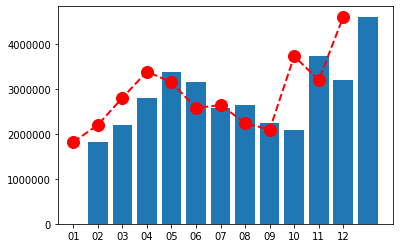

In [97]:
plt.plot(main.groupby('month').sum()['total price'], color='red', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)

plt.bar(range(1,13),main.groupby('month').sum()['total price'],)

# What city had highest Sales?

In [98]:
def extractCity(val):
    city = val.split(',')[1]
    return city

main['city'] = list(map(extractCity, main['Purchase Address']))

In [99]:
groupbyCity = main.groupby('city').sum()

In [100]:
list(groupbyCity['total price'].index)

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

<BarContainer object of 9 artists>

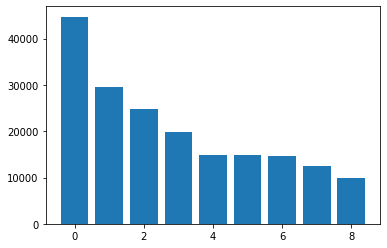

In [101]:
plt.bar(range(len(main['city'].value_counts())),main['city'].value_counts())

In [102]:
main[main.duplicated(keep=False)]['Order ID']

29        176585
30        176585
1298      177795
1299      177795
1676      178158
           ...  
185965    259035
186237    259296
186238    259296
186240    259297
186241    259297
Name: Order ID, Length: 528, dtype: object

In [103]:
df = main[main['Order ID'].duplicated(keep=False)]

In [104]:
df['comb'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df = df[['Order ID', 'comb']].drop_duplicates()

In [106]:
from collections import Counter
from itertools import combinations


count = Counter()

for row in df['comb']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))



count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# What product being sold most and why?

In [107]:
groupbyProduct = main.groupby('Product').sum()['Quantity Ordered']

In [108]:
groupbyProduct.index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

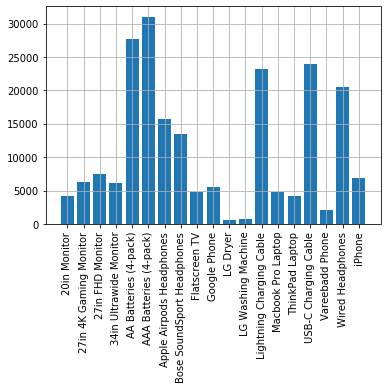

In [109]:
plt.bar(groupbyProduct.index, groupbyProduct.values)

plt.xticks(groupbyProduct.index, rotation = 'vertical')
plt.grid()
plt.show()



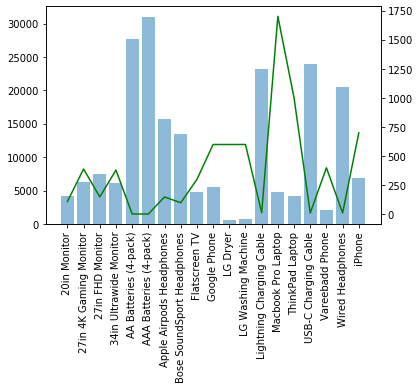

In [110]:
groupbyPriceEach = main.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(groupbyProduct.index, groupbyProduct.values, alpha = 0.5)
ax2.plot(groupbyPriceEach.index, groupbyPriceEach.values,'g')

ax1.set_xticklabels(groupbyProduct.index, rotation = 'vertical')

# plt.grid()
plt.show()


